In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [157]:
debug = False
if debug:
    file_name = 'debug_data.pkl'
else:
    file_name = 'data.pkl'

In [158]:
df = pd.read_pickle('./Data/Rawdata/' + file_name)
df.head()

,borough,bin_#,house_#,street_name,job_#,job_doc._#,job_type,self_cert,block,lot,...,owner’s_house_state,owner’s_house_zip_code,owner's_phone_#,dobrundate,permit_si_no,latitude,longitude,council_district,census_tract,nta_name
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,00853,00002,...,NaN,<NA>,2125942700,2022-05-11,3905851,40.740909,-73.987947,2.0,56.0,Hudson Yards-Chelsea-Flatiron-Union Square
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,05687,00066,...,NaN,<NA>,9174201655,2022-05-11,3905852,40.563654,-74.179584,51.0,17008.0,Arden Heights
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,00064,00022,...,NaN,<NA>,7188125847,2022-05-11,3905853,40.639633,-74.094169,49.0,81.0,West New Brighton-New Brighton-St. George
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,05260,00001,...,NaN,<NA>,3478575846,2022-05-11,3905854,40.544597,-74.157153,51.0,15601.0,Great Kills
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,04242,00045,...,NaN,<NA>,7186195891,2022-05-11,3905855,40.566798,-74.119726,50.0,134.0,New Dorp-Midland Beach


In [159]:
# These are the feature to keep from the project description provided
columns_to_keep = ['borough', 'job_type', 'block', 'lot', 'zip_code', 'work_type', 'bldg_type', "owner's_business_type", 
                   'non-profit', 'latitude', 'longitude', 'council_district', 'issuance_date', 'job_start_date', 
                   'permit_type']
df = df[columns_to_keep]
df.head()

,borough,job_type,block,lot,zip_code,work_type,bldg_type,owner's_business_type,non-profit,latitude,longitude,council_district,issuance_date,job_start_date,permit_type
0,MANHATTAN,A3,00853,00002,10010.0,EQ,2.0,CORPORATION,N,40.740909,-73.987947,2.0,2022-05-10,2022-05-10,EQ
1,STATEN ISLAND,A2,05687,00066,10312.0,OT,1.0,INDIVIDUAL,N,40.563654,-74.179584,51.0,2022-05-10,2022-05-12,EW
2,STATEN ISLAND,A2,00064,00022,10301.0,OT,1.0,INDIVIDUAL,N,40.639633,-74.094169,49.0,2022-05-10,2022-05-15,EW
3,STATEN ISLAND,A2,05260,00001,10308.0,OT,1.0,INDIVIDUAL,N,40.544597,-74.157153,51.0,2022-05-10,2022-05-15,EW
4,STATEN ISLAND,A2,04242,00045,10306.0,OT,1.0,INDIVIDUAL,N,40.566798,-74.119726,50.0,2022-05-10,2022-05-24,EW


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952399 entries, 0 to 3952398
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   borough                category      
 1   job_type               category      
 2   block                  string        
 3   lot                    string        
 4   zip_code               string        
 5   work_type              category      
 6   bldg_type              category      
 7   owner's_business_type  category      
 8   non-profit             category      
 9   latitude               float64       
 10  longitude              float64       
 11  council_district       category      
 12  issuance_date          datetime64[ns]
 13  job_start_date         datetime64[ns]
 14  permit_type            category      
dtypes: category(8), datetime64[ns](2), float64(2), string(3)
memory usage: 241.2 MB


In [161]:
df.nunique()

borough                       5
job_type                      6
block                     13908
lot                        2083
zip_code                    229
work_type                    13
bldg_type                     2
owner's_business_type        15
non-profit                    4
latitude                 235008
longitude                248591
council_district             51
issuance_date             10040
job_start_date            10963
permit_type                   8
dtype: int64

In [162]:
df.isna().sum()

borough                       0
job_type                      0
block                       495
lot                         504
zip_code                   1205
work_type                711038
bldg_type                 57389
owner's_business_type    171555
non-profit               167284
latitude                  11523
longitude                 11523
council_district          11523
issuance_date            109975
job_start_date            90019
permit_type                   1
dtype: int64

In [163]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2968246 entries, 0 to 2968245
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   borough                category      
 1   job_type               category      
 2   block                  string        
 3   lot                    string        
 4   zip_code               string        
 5   work_type              category      
 6   bldg_type              category      
 7   owner's_business_type  category      
 8   non-profit             category      
 9   latitude               float64       
 10  longitude              float64       
 11  council_district       category      
 12  issuance_date          datetime64[ns]
 13  job_start_date         datetime64[ns]
 14  permit_type            category      
dtypes: category(8), datetime64[ns](2), float64(2), string(3)
memory usage: 181.2 MB


In [164]:
import pandas as pd

# Assuming df is your DataFrame
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['lot'] = pd.to_numeric(df['lot'], errors='coerce')
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')

# Detect rows with non-numeric values
non_numeric_blocks = df[df['block'].isna()]
non_numeric_lots = df[df['lot'].isna()]
non_numeric_zip_codes = df[df['zip_code'].isna()]

# Print or inspect the rows with non-numeric values
print("Rows with non-numeric values in 'block':")
print(non_numeric_blocks)
print("\nCount of rows with non-numeric values in 'block':", len(non_numeric_blocks))

print("\nRows with non-numeric values in 'lot':")
print(non_numeric_lots)
print("\nCount of rows with non-numeric values in 'lot':", len(non_numeric_lots))

print("\nRows with non-numeric values in 'zip_code':")
print(non_numeric_zip_codes)
print("\nCount of rows with non-numeric values in 'zip_code':", len(non_numeric_zip_codes))


Rows with non-numeric values in 'block':
               borough job_type  block  lot  zip_code work_type bldg_type  \
609821   STATEN ISLAND       NB   <NA>   84   10312.0        EQ       1.0   
2654957  STATEN ISLAND       NB   <NA>   84   10312.0        EQ       1.0   
2669043  STATEN ISLAND       NB   <NA>   84   10312.0        PL       1.0   

        owner's_business_type non-profit  latitude  longitude  \
609821             INDIVIDUAL          N  40.52415 -74.180489   
2654957            INDIVIDUAL          N  40.52415 -74.180489   
2669043            INDIVIDUAL          N  40.52415 -74.180489   

        council_district issuance_date job_start_date permit_type  
609821              51.0    2005-03-04     2004-10-28          EQ  
2654957             51.0    2004-10-28     2004-10-28          EQ  
2669043             51.0    2004-12-01     2004-12-02          PL  

Count of rows with non-numeric values in 'block': 3

Rows with non-numeric values in 'lot':
           borough job_t

In [165]:
import pandas as pd

# Assuming df is your DataFrame
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['lot'] = pd.to_numeric(df['lot'], errors='coerce')
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')

# Remove rows with non-numeric values
df = df.dropna(subset=['block', 'lot', 'zip_code'], how='any')

# Print or inspect the cleaned DataFrame
print("Cleaned DataFrame:")
print(df)


Cleaned DataFrame:
               borough job_type  block  lot  zip_code work_type bldg_type  \
0            MANHATTAN       A3    853    2   10010.0        EQ       2.0   
1        STATEN ISLAND       A2   5687   66   10312.0        OT       1.0   
2        STATEN ISLAND       A2     64   22   10301.0        OT       1.0   
3        STATEN ISLAND       A2   5260    1   10308.0        OT       1.0   
4        STATEN ISLAND       A2   4242   45   10306.0        OT       1.0   
...                ...      ...    ...  ...       ...       ...       ...   
2968241         QUEENS       A2    191   47   11104.0        FP       2.0   
2968242         QUEENS       A2    191   49   11104.0        OT       2.0   
2968243         QUEENS       A2    191   49   11104.0        MH       2.0   
2968244         QUEENS       A2    191   49   11104.0        PL       2.0   
2968245         QUEENS       A2    191   49   11104.0        FP       2.0   

        owner's_business_type non-profit   latitude  lon

In [166]:

df['zip_code'].unique()


<FloatingArray>
[10010.0, 10312.0, 10301.0, 10308.0, 10306.0, 11231.0, 11221.0, 11214.0,
 11697.0, 11102.0,
 ...
 10123.0, 10110.0, 10000.0, 11251.0, 10278.0, 11695.0, 10162.0, 10045.0,
 10048.0, 11371.0]
Length: 224, dtype: Float64

In [167]:
df.dtypes

borough                        category
job_type                       category
block                             Int64
lot                               Int64
zip_code                        Float64
work_type                      category
bldg_type                      category
owner's_business_type          category
non-profit                     category
latitude                        float64
longitude                       float64
council_district               category
issuance_date            datetime64[ns]
job_start_date           datetime64[ns]
permit_type                    category
dtype: object

In [168]:
df.describe()

,block,lot,zip_code,latitude,longitude,issuance_date,job_start_date
count,2968224.0,2968224.0,2968224.0,2.968224e+06,2.968224e+06,2968224,2968224
mean,2961.222742,513.392959,10610.390964,4.072842e+01,-7.394651e+01,2009-08-03 17:52:42.909538048,2009-02-19 17:56:23.113942784
min,0.0,0.0,10000.0,4.049881e+01,-7.425490e+01,1989-05-11 00:00:00,1989-05-11 00:00:00
25%,874.0,11.0,10022.0,4.068863e+01,-7.398861e+01,2003-12-23 00:00:00,2003-08-05 00:00:00
50%,1545.0,31.0,10452.0,4.073865e+01,-7.396371e+01,2010-10-26 00:00:00,2010-03-30 00:00:00
75%,4065.0,58.0,11222.0,4.076742e+01,-7.391030e+01,2016-03-17 00:00:00,2015-09-02 00:00:00
max,98501.0,99917.0,91217.0,4.091371e+01,-7.370038e+01,2023-09-18 00:00:00,2222-08-19 00:00:00
std,3204.821086,1821.47113,600.511207,7.040365e-02,7.903296e-02,NaN,NaN


In [169]:
df.permit_type.value_counts()

permit_type
EW    1631321
PL     694309
EQ     537225
AL     105368
NB          1
DM          0
FO          0
SG          0
Name: count, dtype: int64

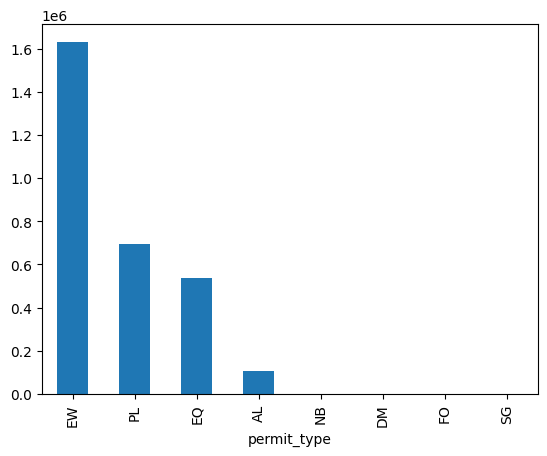

In [170]:
df.permit_type.value_counts().plot(kind='bar')
plt.show()

borough
MANHATTAN        1331025
BROOKLYN          682529
QUEENS            577524
BRONX             243922
STATEN ISLAND     133224
Name: count, dtype: int64



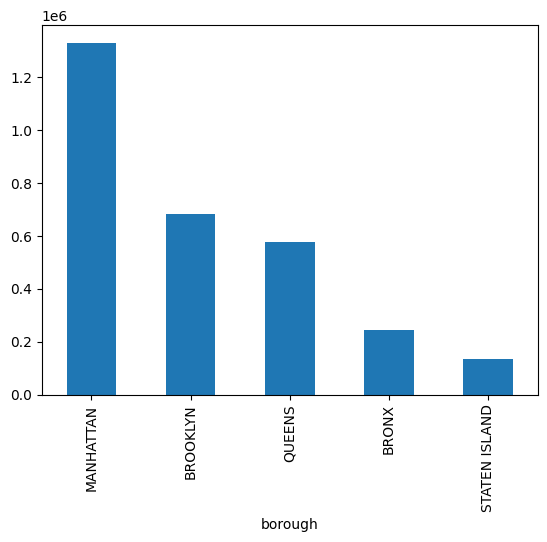





job_type
A2    2162464
A3     389499
NB     231199
A1     157714
DM      27332
SG         16
Name: count, dtype: int64



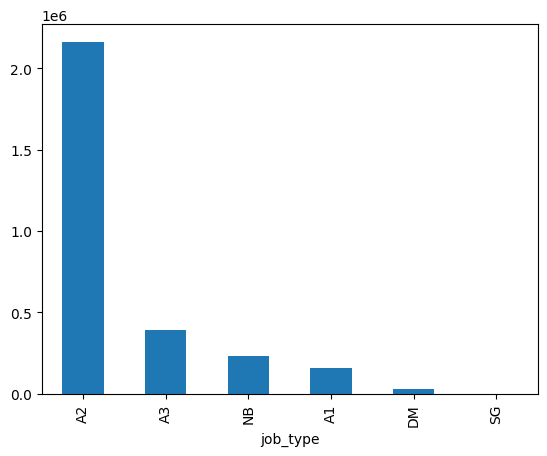





work_type
OT    1100965
PL     694309
EQ     537225
MH     277112
SP     130149
BL      71427
FP      61910
FB      39178
FS      22835
SD      21534
CC      11359
FA        220
NB          1
Name: count, dtype: int64



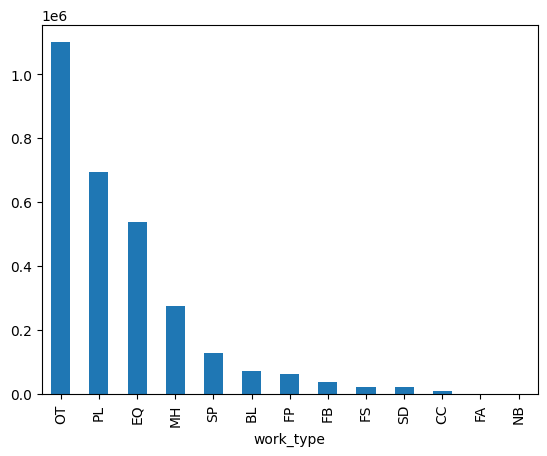





bldg_type
2.0    2361684
1.0     606540
Name: count, dtype: int64



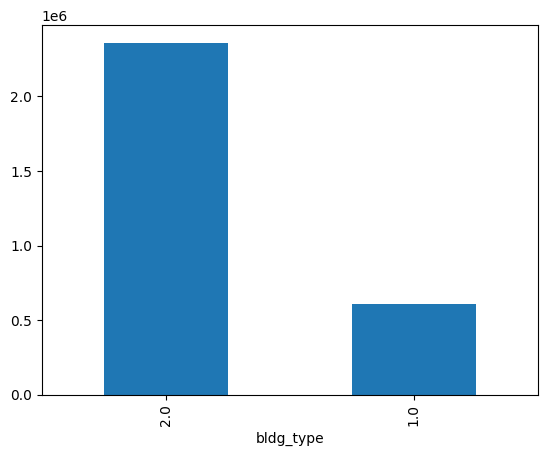





owner's_business_type
CORPORATION            1008645
INDIVIDUAL              919902
PARTNERSHIP             701186
OTHER                   114737
CONDO/CO-OP             103087
OTHER GOV'T AGENCY       69494
NYCHA/HHC                18467
NYCHA                    12569
NYC AGENCY               11677
HPD                       4201
HHC                       1199
DCAS                      1144
NY STATE                   979
DOE                        937
2022-05-09 00:00:00          0
Name: count, dtype: int64



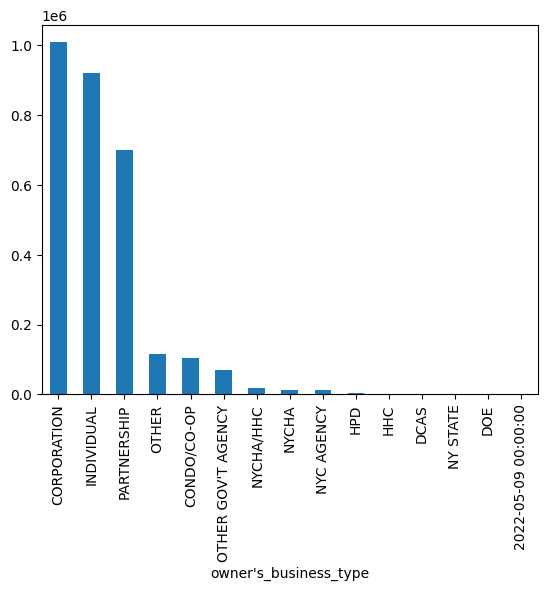





non-profit
N    2775783
Y     192441
8          0
          0
Name: count, dtype: int64



C:\Users\burzi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


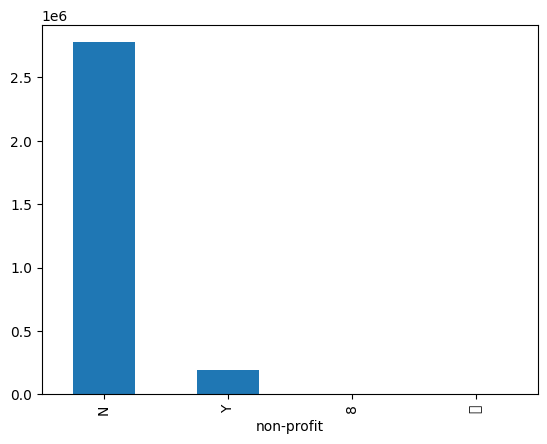





council_district
4.0     375787
3.0     246498
1.0     208429
2.0     130476
6.0     116292
33.0     97594
5.0      84057
39.0     67368
26.0     59004
19.0     58225
34.0     57278
9.0      56003
35.0     53529
7.0      53140
38.0     49233
20.0     48281
51.0     47707
36.0     46907
50.0     46686
8.0      45621
22.0     44108
32.0     42322
31.0     40057
48.0     39941
43.0     39564
49.0     38831
17.0     38796
24.0     38497
23.0     36553
28.0     36522
47.0     36470
29.0     36453
44.0     35429
10.0     35077
30.0     34969
37.0     34805
27.0     34450
21.0     32790
13.0     30900
11.0     30169
42.0     29124
25.0     28489
41.0     28275
15.0     28079
46.0     26363
12.0     25784
40.0     25118
16.0     24356
18.0     23920
45.0     23380
14.0     20518
Name: count, dtype: int64



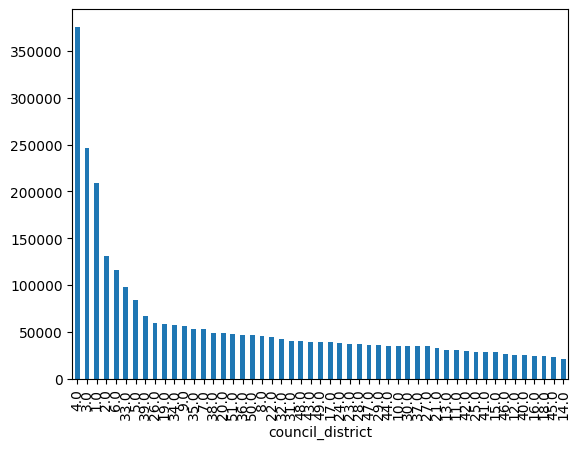

In [171]:
categorical_features = ['borough', 'job_type', 'work_type', 'bldg_type', "owner's_business_type", 'non-profit', 
                        'council_district']

for feature in categorical_features:
    print(df[feature].value_counts(), end='\n\n')
    df[feature].value_counts().plot(kind='bar')
    plt.show()
    print('\n\n\n')

In [172]:
df.zip_code.value_counts()

zip_code
10022.0    78765
10019.0    64762
10013.0    60987
10011.0    60589
10003.0    59458
           ...  
10045.0       17
11695.0       16
10048.0        9
11371.0        9
91217.0        1
Name: count, Length: 224, dtype: Int64

In [173]:
df['issuance_year'] = df.issuance_date.dt.year
df['issuance_month'] = df.issuance_date.dt.month
df['issuance_day'] = df.issuance_date.dt.day

df['job_start_year'] = df.job_start_date.dt.year
df['job_start_month'] = df.job_start_date.dt.month
df['job_start_day'] = df.job_start_date.dt.day

In [174]:
correlation_matrix = df.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
correlation_matrix

,borough,job_type,block,lot,zip_code,work_type,bldg_type,owner's_business_type,non-profit,latitude,...,council_district,issuance_date,job_start_date,permit_type,issuance_year,issuance_month,issuance_day,job_start_year,job_start_month,job_start_day
borough,1.000000,0.163531,0.321930,0.094534,0.214417,-0.025867,0.333220,0.068174,0.045253,0.323678,...,0.388175,-0.016600,-0.008109,0.045856,-0.023160,0.001249,0.000777,0.010896,-0.004158,0.001201
job_type,0.163531,1.000000,0.106717,0.050563,0.023927,-0.004386,0.316901,-0.063428,-0.024812,0.141891,...,0.015360,-0.023381,-0.000521,0.097142,0.000065,0.001354,-0.001113,0.066476,0.000764,0.000097
block,0.321930,0.106717,1.000000,0.020420,0.104042,-0.019471,0.231765,-0.018421,0.005437,0.230473,...,0.104241,0.004166,0.017139,0.037297,0.003125,0.005270,0.000111,0.030139,-0.000543,-0.000229
lot,0.094534,0.050563,0.020420,1.000000,0.078679,-0.011767,0.128666,-0.029548,-0.020958,0.104851,...,0.042876,0.002800,0.001864,0.020492,-0.002237,0.001371,-0.000544,0.001967,-0.002083,-0.000270
zip_code,0.214417,0.023927,0.104042,0.078679,1.000000,0.019717,0.046251,0.023233,0.017493,0.041118,...,0.200577,-0.002073,0.007708,0.016194,0.002186,0.000766,0.001101,0.015179,-0.001237,0.000580
work_type,-0.025867,-0.004386,-0.019471,-0.011767,0.019717,1.000000,-0.130726,-0.046614,0.000993,-0.038084,...,-0.005390,0.019678,0.033379,0.243349,0.054072,0.002034,0.000963,0.050244,0.008386,0.001337
bldg_type,0.333220,0.316901,0.231765,0.128666,0.046251,-0.130726,1.000000,-0.087436,-0.068269,0.338940,...,0.017775,-0.028277,-0.026997,0.093723,-0.033798,0.002321,0.000126,-0.003628,-0.002669,-0.000805
owner's_business_type,0.068174,-0.063428,-0.018421,-0.029548,0.023233,-0.046614,-0.087436,1.000000,0.230355,-0.060537,...,0.078315,-0.000159,0.012206,-0.059242,0.005337,-0.000841,-0.001685,0.013743,-0.002759,0.001234
non-profit,0.045253,-0.024812,0.005437,-0.020958,0.017493,0.000993,-0.068269,0.230355,1.000000,-0.028451,...,0.064753,-0.004616,0.011969,-0.025915,0.005872,0.001833,-0.000786,0.027713,-0.003689,-0.001024
latitude,0.323678,0.141891,0.230473,0.104851,0.041118,-0.038084,0.338940,-0.060537,-0.028451,1.000000,...,0.140623,0.050471,0.013068,0.053189,-0.012448,0.006868,-0.002219,-0.051444,-0.000100,-0.001146


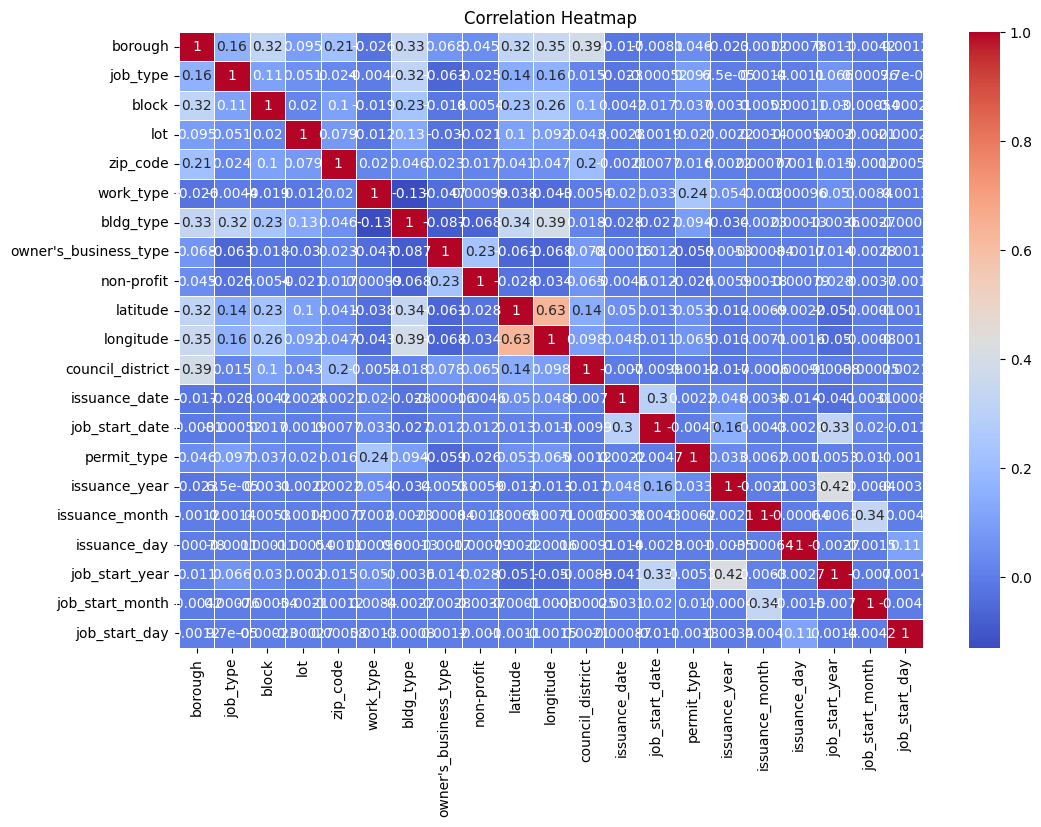

In [175]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [177]:
X = df[['borough', 'job_type', 'block', 'lot', 'zip_code', 'work_type', 'bldg_type',
        "owner's_business_type", 'non-profit', 'latitude', 'longitude',
        'council_district', 'issuance_year', 'issuance_month', 'issuance_day', 'job_start_year', 'job_start_month', 
        'job_start_day']]
y = df['permit_type']

In [178]:
le = LabelEncoder()
X['borough'] = le.fit_transform(X['borough'])
X['job_type'] = le.fit_transform(X['job_type'])
X["owner's_business_type"] = le.fit_transform(X["owner's_business_type"])
X['work_type'] = le.fit_transform(X['work_type'])
X['bldg_type'] = le.fit_transform(X['bldg_type'])
# X['block'] = le.fit_transform(X['block'])
# X['lot'] = le.fit_transform(X['lot'])
# X['zip_code'] = le.fit_transform(X['zip_code'])
X['non-profit'] = le.fit_transform(X['non-profit'])

C:\Users\burzi\AppData\Local\Temp\ipykernel_13616\1937976821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['borough'] = le.fit_transform(X['borough'])
C:\Users\burzi\AppData\Local\Temp\ipykernel_13616\1937976821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job_type'] = le.fit_transform(X['job_type'])
C:\Users\burzi\AppData\Local\Temp\ipykernel_13616\1937976821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [179]:
#list for cols to scale
cols_to_scale = ['block','lot', 'zip_code', 'latitude', 'longitude', 'council_district', 'issuance_year',
                 'issuance_month', 'issuance_day', 'job_start_year', 'job_start_month', 'job_start_day']

#create and fit scaler
scaler = StandardScaler()

#scale selected data
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

C:\Users\burzi\AppData\Local\Temp\ipykernel_13616\869922798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [182]:
with open('./Data/log_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [183]:
with open('./Data/log_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [184]:
y_pred = model.predict(X_test)

In [185]:
accuracy_score(y_test, y_pred)

0.7404981091393005

In [186]:
X_train

,borough,job_type,block,lot,zip_code,work_type,bldg_type,owner's_business_type,non-profit,latitude,longitude,council_district,issuance_year,issuance_month,issuance_day,job_start_year,job_start_month,job_start_day
1547284,3,2,-0.536761,-0.232995,1.276594,2,1,13,0,0.240589,0.496002,0.425353,0.616008,1.034818,1.621021,0.675337,-1.377589,1.171239
203929,4,1,-0.626002,-0.281307,-0.493564,9,1,11,0,-1.912169,-2.390541,1.911114,-1.266658,1.330565,-0.093762,-1.211639,1.314837,-0.094896
1498921,1,2,0.738505,-0.270327,1.011820,2,1,13,0,-1.154154,-0.362248,1.230140,0.616008,-0.148166,0.820789,0.675337,-1.377589,-1.476134
346309,3,2,1.876479,-0.226956,1.349865,2,1,11,1,-0.520664,1.233656,0.796793,-0.262570,0.443326,-1.122632,-0.205252,0.417362,-1.130825
1515255,1,1,-0.316780,-0.269229,1.045125,10,0,1,0,-0.570335,-0.237047,0.982513,0.616008,0.147580,1.392383,0.675337,0.118203,1.401445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692759,3,1,-0.325517,-0.228603,1.261607,2,1,13,0,0.101406,1.091374,0.115819,0.741519,0.443326,0.134875,0.549539,-0.180955,-1.476134
2356348,3,1,0.629295,3.836244,1.238294,9,1,1,0,0.462197,1.470596,0.053912,1.369074,0.147580,0.935108,1.430127,-1.078431,1.056136
2229102,1,1,-0.547370,-0.265386,1.008489,9,1,13,0,-0.722855,-0.014874,1.044420,1.118052,0.443326,0.134875,1.178530,0.417362,0.480620
2768328,2,1,-0.325829,-0.207740,-0.954838,9,1,1,0,1.196918,0.058197,-0.627061,-1.643191,0.147580,-1.694227,-1.589034,0.118203,-1.706341


# Fit Deep Learning Model

## Model Definition

In [205]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [224]:
class RNN_Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_Network, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]  # Take the output from the last time step
        out = self.fc(out)
        return nn.functional.softmax(out, dim=1)

In [225]:
# Instantiate the model with output_size=5
model = RNN_Network(input_size=18, hidden_size=512, output_size=5)

In [208]:
# Cross-Entropy as loss function
criterion = nn.CrossEntropyLoss()

## Preparing Data For Training

In [209]:
# Assuming you have your data loaded and split as mentioned in your code
X_tensor = torch.tensor(X.values, dtype=torch.float32)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

In [210]:
# Creating TensorDatasets
train_data = TensorDataset(X_tensor, y_tensor)
test_data = TensorDataset(X_test, y_test)

# Creating DataLoaders
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [190]:
# X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

## Model Training

In [240]:
def train_loop(dataloader, model, criterion, optimizer, print_every=1):
    size = len(dataloader.dataset)
    model.train()
    running_loss = 0.0
    total_instances = 0  # New variable to keep track of total instances processed
    for batch, (X, y) in enumerate(dataloader):
        # Ensure X is in the required shape (batch_size, sequence_length, input_size)
        X = X.unsqueeze(1)  # Assuming sequence_length is 1 for simplicity
        pred = model(X)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        total_instances += len(y)

        if total_instances >= print_every:
            current = total_instances
            print(f"Batch [{current:>5d}/{size:>5d}] - Running Loss: {running_loss / total_instances:.6f}")
            running_loss = 0.0  # Reset running loss
            total_instances = 0  # Reset total instances

    # Print epoch number after every specified total instances
    epoch_num = (batch + 1) // print_every + 1
    print(f"Epoch {epoch_num} completed\n-------------------------------")
    
        # Calculate F1 score on the training set
    train_predictions, train_labels = [], []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.unsqueeze(1)
            predictions = model(X_batch)
            _, predicted = torch.max(predictions, 1)
            train_predictions.extend(predicted.tolist())
            train_labels.extend(y_batch.tolist())

    train_f1 = f1_score(train_labels, train_predictions, average='weighted')
    print(f"Training F1 Score: {train_f1:.4f}")


In [241]:
from sklearn.metrics import f1_score

def test_loop(dataloader, model, criterion):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    total_instances = 0  # New variable to keep track of total instances processed

    with torch.no_grad():
        for X, y in dataloader:
            X = X.unsqueeze(1)
            pred = model(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            total_instances += len(y)  # Increment total instances by the batch size

    test_loss /= num_batches
    correct /= total_instances  # Correct the calculation to divide by total instances
    accuracy = correct * 100

    # Calculate F1 score on the test set
    test_predictions, test_labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.unsqueeze(1)
            predictions = model(X_batch)
            _, predicted = torch.max(predictions, 1)
            test_predictions.extend(predicted.tolist())
            test_labels.extend(y_batch.tolist())

    test_f1 = f1_score(test_labels, test_predictions, average='weighted')
    print(f"Test Error: \n Accuracy: {accuracy:.3f}%, Avg loss: {test_loss:.8f}, F1 Score: {test_f1:.4f} \n")

    return accuracy, test_f1


In [242]:
# ...
# Optimizer with Adam
optimizer1 = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer1, print_every=700000)
    test_loop(test_loader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
Batch [700032/2968224] - Running Loss: 0.018748
Batch [700032/2968224] - Running Loss: 0.018725
Batch [700032/2968224] - Running Loss: 0.018717
Batch [700032/2968224] - Running Loss: 0.018726
Epoch 1 completed
-------------------------------
Training F1 Score: 0.5989
Test Error: 
 Accuracy: 70.666%, Avg loss: 1.19817586, F1 Score: 0.5992 

Epoch 2
-------------------------------
Batch [700032/2968224] - Running Loss: 0.018736
Batch [700032/2968224] - Running Loss: 0.018730
Batch [700032/2968224] - Running Loss: 0.018720
Batch [700032/2968224] - Running Loss: 0.018717
Epoch 1 completed
-------------------------------
Training F1 Score: 0.5989
Test Error: 
 Accuracy: 70.666%, Avg loss: 1.19816965, F1 Score: 0.5992 

Epoch 3
-------------------------------
Batch [700032/2968224] - Running Loss: 0.018740
Batch [700032/2968224] - Running Loss: 0.018726
Batch [700032/2968224] - Running Loss: 0.018718
Batch [700032/2968224] - Running Loss: 0.018723
Epoc

In [217]:
# Optimizer with SGD
optimizer2 = torch.optim.SGD(model.parameters(), lr=0.001)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer2, print_every=700000)
    test_loop(test_loader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
Batch [700032/2968224] - Running Loss: 0.018707
Batch [700032/2968224] - Running Loss: 0.018735
Batch [700032/2968224] - Running Loss: 0.018720
Batch [700032/2968224] - Running Loss: 0.018738
Epoch 1 completed
-------------------------------
Test Error: 
 Accuracy: 70.664454%, Avg loss: 1.198186 

Epoch 2
-------------------------------
Batch [700032/2968224] - Running Loss: 0.018710
Batch [700032/2968224] - Running Loss: 0.018735
Batch [700032/2968224] - Running Loss: 0.018728
Batch [700032/2968224] - Running Loss: 0.018721
Epoch 1 completed
-------------------------------
Test Error: 
 Accuracy: 70.664623%, Avg loss: 1.198185 

Epoch 3
-------------------------------
Batch [700032/2968224] - Running Loss: 0.018744
Batch [700032/2968224] - Running Loss: 0.018723
Batch [700032/2968224] - Running Loss: 0.018713
Batch [700032/2968224] - Running Loss: 0.018718
Epoch 1 completed
-------------------------------
Test Error: 
 Accuracy: 70.664623%, Avg 

## No Batch Normalization Applied

In [228]:
class RNN_Network_NBN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_Network_NBN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        
        # Check the number of dimensions in the output tensor
        if len(out.shape) == 3:
            out = out[:, -1, :]  # Take the output from the last time step

        out = self.fc(out)
        return nn.functional.softmax(out, dim=1)

In [229]:
model_NBN = RNN_Network_NBN(input_size=18, hidden_size=512, output_size=5)

In [230]:
# Cross-Entropy as loss function
criterion = nn.CrossEntropyLoss()
# Adam as optimizer
optimizer = torch.optim.Adam(model_NBN.parameters(), lr=0.001)

In [231]:
### Batch Size, n=64

In [232]:
batch_size = 64 
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [234]:
num_epochs = 10  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model_NBN.train()  # Set the model to training mode
    for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
        # Forward pass: Compute predictions and loss
        outputs = model_NBN(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Batch [1/46379], Loss: 1.1392
Epoch [1/10], Batch [101/46379], Loss: 1.2173
Epoch [1/10], Batch [201/46379], Loss: 1.1705
Epoch [1/10], Batch [301/46379], Loss: 1.1392
Epoch [1/10], Batch [401/46379], Loss: 1.2173
Epoch [1/10], Batch [501/46379], Loss: 1.1705
Epoch [1/10], Batch [601/46379], Loss: 1.2017
Epoch [1/10], Batch [701/46379], Loss: 1.1392
Epoch [1/10], Batch [801/46379], Loss: 1.2017
Epoch [1/10], Batch [901/46379], Loss: 1.1548
Epoch [1/10], Batch [1001/46379], Loss: 1.1861
Epoch [1/10], Batch [1101/46379], Loss: 1.1236
Epoch [1/10], Batch [1201/46379], Loss: 1.1861
Epoch [1/10], Batch [1301/46379], Loss: 1.1548
Epoch [1/10], Batch [1401/46379], Loss: 1.2173
Epoch [1/10], Batch [1501/46379], Loss: 1.1861
Epoch [1/10], Batch [1601/46379], Loss: 1.2955
Epoch [1/10], Batch [1701/46379], Loss: 1.2955
Epoch [1/10], Batch [1801/46379], Loss: 1.2798
Epoch [1/10], Batch [1901/46379], Loss: 1.1080
Epoch [1/10], Batch [2001/46379], Loss: 1.3111
Epoch [1/10], Batch [2101

Epoch [1/10], Batch [17401/46379], Loss: 1.1705
Epoch [1/10], Batch [17501/46379], Loss: 1.2173
Epoch [1/10], Batch [17601/46379], Loss: 1.2017
Epoch [1/10], Batch [17701/46379], Loss: 1.2330
Epoch [1/10], Batch [17801/46379], Loss: 1.2017
Epoch [1/10], Batch [17901/46379], Loss: 1.2486
Epoch [1/10], Batch [18001/46379], Loss: 1.1861
Epoch [1/10], Batch [18101/46379], Loss: 1.1548
Epoch [1/10], Batch [18201/46379], Loss: 1.2643
Epoch [1/10], Batch [18301/46379], Loss: 1.3423
Epoch [1/10], Batch [18401/46379], Loss: 1.2486
Epoch [1/10], Batch [18501/46379], Loss: 1.2955
Epoch [1/10], Batch [18601/46379], Loss: 1.2173
Epoch [1/10], Batch [18701/46379], Loss: 1.2330
Epoch [1/10], Batch [18801/46379], Loss: 1.1705
Epoch [1/10], Batch [18901/46379], Loss: 1.1236
Epoch [1/10], Batch [19001/46379], Loss: 1.1080
Epoch [1/10], Batch [19101/46379], Loss: 1.2798
Epoch [1/10], Batch [19201/46379], Loss: 1.1236
Epoch [1/10], Batch [19301/46379], Loss: 1.1080
Epoch [1/10], Batch [19401/46379], Loss:

Epoch [1/10], Batch [34501/46379], Loss: 1.2017
Epoch [1/10], Batch [34601/46379], Loss: 1.1548
Epoch [1/10], Batch [34701/46379], Loss: 1.1705
Epoch [1/10], Batch [34801/46379], Loss: 1.1392
Epoch [1/10], Batch [34901/46379], Loss: 1.1392
Epoch [1/10], Batch [35001/46379], Loss: 1.2486
Epoch [1/10], Batch [35101/46379], Loss: 1.2330
Epoch [1/10], Batch [35201/46379], Loss: 1.2486
Epoch [1/10], Batch [35301/46379], Loss: 1.2798
Epoch [1/10], Batch [35401/46379], Loss: 1.0923
Epoch [1/10], Batch [35501/46379], Loss: 1.2642
Epoch [1/10], Batch [35601/46379], Loss: 1.1705
Epoch [1/10], Batch [35701/46379], Loss: 1.2173
Epoch [1/10], Batch [35801/46379], Loss: 1.2486
Epoch [1/10], Batch [35901/46379], Loss: 1.1861
Epoch [1/10], Batch [36001/46379], Loss: 1.2173
Epoch [1/10], Batch [36101/46379], Loss: 1.1548
Epoch [1/10], Batch [36201/46379], Loss: 1.2330
Epoch [1/10], Batch [36301/46379], Loss: 1.2173
Epoch [1/10], Batch [36401/46379], Loss: 1.1548
Epoch [1/10], Batch [36501/46379], Loss:

Epoch [2/10], Batch [5301/46379], Loss: 1.2955
Epoch [2/10], Batch [5401/46379], Loss: 1.2017
Epoch [2/10], Batch [5501/46379], Loss: 1.2955
Epoch [2/10], Batch [5601/46379], Loss: 1.2798
Epoch [2/10], Batch [5701/46379], Loss: 1.2486
Epoch [2/10], Batch [5801/46379], Loss: 1.3267
Epoch [2/10], Batch [5901/46379], Loss: 1.2798
Epoch [2/10], Batch [6001/46379], Loss: 1.1548
Epoch [2/10], Batch [6101/46379], Loss: 1.2486
Epoch [2/10], Batch [6201/46379], Loss: 1.1392
Epoch [2/10], Batch [6301/46379], Loss: 1.1548
Epoch [2/10], Batch [6401/46379], Loss: 1.1548
Epoch [2/10], Batch [6501/46379], Loss: 1.1392
Epoch [2/10], Batch [6601/46379], Loss: 1.1392
Epoch [2/10], Batch [6701/46379], Loss: 1.1705
Epoch [2/10], Batch [6801/46379], Loss: 1.1548
Epoch [2/10], Batch [6901/46379], Loss: 1.1392
Epoch [2/10], Batch [7001/46379], Loss: 1.2330
Epoch [2/10], Batch [7101/46379], Loss: 1.2017
Epoch [2/10], Batch [7201/46379], Loss: 1.1548
Epoch [2/10], Batch [7301/46379], Loss: 1.1548
Epoch [2/10],

Epoch [2/10], Batch [22501/46379], Loss: 1.2330
Epoch [2/10], Batch [22601/46379], Loss: 1.1861
Epoch [2/10], Batch [22701/46379], Loss: 1.1549
Epoch [2/10], Batch [22801/46379], Loss: 1.1861
Epoch [2/10], Batch [22901/46379], Loss: 1.1705
Epoch [2/10], Batch [23001/46379], Loss: 1.2017
Epoch [2/10], Batch [23101/46379], Loss: 1.1861
Epoch [2/10], Batch [23201/46379], Loss: 1.2017
Epoch [2/10], Batch [23301/46379], Loss: 1.2642
Epoch [2/10], Batch [23401/46379], Loss: 1.1236
Epoch [2/10], Batch [23501/46379], Loss: 1.2330
Epoch [2/10], Batch [23601/46379], Loss: 1.0924
Epoch [2/10], Batch [23701/46379], Loss: 1.2799
Epoch [2/10], Batch [23801/46379], Loss: 1.1705
Epoch [2/10], Batch [23901/46379], Loss: 1.2330
Epoch [2/10], Batch [24001/46379], Loss: 1.2330
Epoch [2/10], Batch [24101/46379], Loss: 1.1236
Epoch [2/10], Batch [24201/46379], Loss: 1.1705
Epoch [2/10], Batch [24301/46379], Loss: 1.1861
Epoch [2/10], Batch [24401/46379], Loss: 1.1392
Epoch [2/10], Batch [24501/46379], Loss:

Epoch [2/10], Batch [39601/46379], Loss: 1.1861
Epoch [2/10], Batch [39701/46379], Loss: 1.2798
Epoch [2/10], Batch [39801/46379], Loss: 1.2330
Epoch [2/10], Batch [39901/46379], Loss: 1.2017
Epoch [2/10], Batch [40001/46379], Loss: 1.1236
Epoch [2/10], Batch [40101/46379], Loss: 1.1861
Epoch [2/10], Batch [40201/46379], Loss: 1.1861
Epoch [2/10], Batch [40301/46379], Loss: 1.1861
Epoch [2/10], Batch [40401/46379], Loss: 1.2486
Epoch [2/10], Batch [40501/46379], Loss: 1.1236
Epoch [2/10], Batch [40601/46379], Loss: 1.2173
Epoch [2/10], Batch [40701/46379], Loss: 1.2173
Epoch [2/10], Batch [40801/46379], Loss: 1.1392
Epoch [2/10], Batch [40901/46379], Loss: 1.1080
Epoch [2/10], Batch [41001/46379], Loss: 1.1861
Epoch [2/10], Batch [41101/46379], Loss: 1.2017
Epoch [2/10], Batch [41201/46379], Loss: 1.1392
Epoch [2/10], Batch [41301/46379], Loss: 1.0611
Epoch [2/10], Batch [41401/46379], Loss: 1.2173
Epoch [2/10], Batch [41501/46379], Loss: 1.2486
Epoch [2/10], Batch [41601/46379], Loss:

Epoch [3/10], Batch [10501/46379], Loss: 1.1705
Epoch [3/10], Batch [10601/46379], Loss: 1.2017
Epoch [3/10], Batch [10701/46379], Loss: 1.2642
Epoch [3/10], Batch [10801/46379], Loss: 1.1548
Epoch [3/10], Batch [10901/46379], Loss: 1.2017
Epoch [3/10], Batch [11001/46379], Loss: 1.2017
Epoch [3/10], Batch [11101/46379], Loss: 1.0767
Epoch [3/10], Batch [11201/46379], Loss: 1.1392
Epoch [3/10], Batch [11301/46379], Loss: 1.2642
Epoch [3/10], Batch [11401/46379], Loss: 1.2017
Epoch [3/10], Batch [11501/46379], Loss: 1.1861
Epoch [3/10], Batch [11601/46379], Loss: 1.2173
Epoch [3/10], Batch [11701/46379], Loss: 1.2330
Epoch [3/10], Batch [11801/46379], Loss: 1.1392
Epoch [3/10], Batch [11901/46379], Loss: 1.2017
Epoch [3/10], Batch [12001/46379], Loss: 1.1548
Epoch [3/10], Batch [12101/46379], Loss: 1.3267
Epoch [3/10], Batch [12201/46379], Loss: 1.1861
Epoch [3/10], Batch [12301/46379], Loss: 1.1861
Epoch [3/10], Batch [12401/46379], Loss: 1.2798
Epoch [3/10], Batch [12501/46379], Loss:

Epoch [3/10], Batch [27601/46379], Loss: 1.3267
Epoch [3/10], Batch [27701/46379], Loss: 1.1861
Epoch [3/10], Batch [27801/46379], Loss: 1.2173
Epoch [3/10], Batch [27901/46379], Loss: 1.0923
Epoch [3/10], Batch [28001/46379], Loss: 1.3423
Epoch [3/10], Batch [28101/46379], Loss: 1.1705
Epoch [3/10], Batch [28201/46379], Loss: 1.1705
Epoch [3/10], Batch [28301/46379], Loss: 1.1861
Epoch [3/10], Batch [28401/46379], Loss: 1.1392
Epoch [3/10], Batch [28501/46379], Loss: 1.1705
Epoch [3/10], Batch [28601/46379], Loss: 1.1080
Epoch [3/10], Batch [28701/46379], Loss: 1.2642
Epoch [3/10], Batch [28801/46379], Loss: 1.2173
Epoch [3/10], Batch [28901/46379], Loss: 1.1548
Epoch [3/10], Batch [29001/46379], Loss: 1.1861
Epoch [3/10], Batch [29101/46379], Loss: 1.1861
Epoch [3/10], Batch [29201/46379], Loss: 1.1548
Epoch [3/10], Batch [29301/46379], Loss: 1.1392
Epoch [3/10], Batch [29401/46379], Loss: 1.2330
Epoch [3/10], Batch [29501/46379], Loss: 1.1236
Epoch [3/10], Batch [29601/46379], Loss:

Epoch [3/10], Batch [44701/46379], Loss: 1.2955
Epoch [3/10], Batch [44801/46379], Loss: 1.2173
Epoch [3/10], Batch [44901/46379], Loss: 1.2017
Epoch [3/10], Batch [45001/46379], Loss: 1.1705
Epoch [3/10], Batch [45101/46379], Loss: 1.2173
Epoch [3/10], Batch [45201/46379], Loss: 1.2017
Epoch [3/10], Batch [45301/46379], Loss: 1.1548
Epoch [3/10], Batch [45401/46379], Loss: 1.1080
Epoch [3/10], Batch [45501/46379], Loss: 1.1705
Epoch [3/10], Batch [45601/46379], Loss: 1.2330
Epoch [3/10], Batch [45701/46379], Loss: 1.1705
Epoch [3/10], Batch [45801/46379], Loss: 1.2173
Epoch [3/10], Batch [45901/46379], Loss: 1.1392
Epoch [3/10], Batch [46001/46379], Loss: 1.2486
Epoch [3/10], Batch [46101/46379], Loss: 1.2642
Epoch [3/10], Batch [46201/46379], Loss: 1.1236
Epoch [3/10], Batch [46301/46379], Loss: 1.2642
Epoch [3/10], Loss: 1.1861
Epoch [4/10], Batch [1/46379], Loss: 1.1392
Epoch [4/10], Batch [101/46379], Loss: 1.2017
Epoch [4/10], Batch [201/46379], Loss: 1.2173
Epoch [4/10], Batch [

Epoch [4/10], Batch [15601/46379], Loss: 1.2017
Epoch [4/10], Batch [15701/46379], Loss: 1.1861
Epoch [4/10], Batch [15801/46379], Loss: 1.1861
Epoch [4/10], Batch [15901/46379], Loss: 1.2798
Epoch [4/10], Batch [16001/46379], Loss: 1.2173
Epoch [4/10], Batch [16101/46379], Loss: 1.2173
Epoch [4/10], Batch [16201/46379], Loss: 1.2798
Epoch [4/10], Batch [16301/46379], Loss: 1.2486
Epoch [4/10], Batch [16401/46379], Loss: 1.2486
Epoch [4/10], Batch [16501/46379], Loss: 1.2173
Epoch [4/10], Batch [16601/46379], Loss: 1.1392
Epoch [4/10], Batch [16701/46379], Loss: 1.1861
Epoch [4/10], Batch [16801/46379], Loss: 1.1861
Epoch [4/10], Batch [16901/46379], Loss: 1.1236
Epoch [4/10], Batch [17001/46379], Loss: 1.2642
Epoch [4/10], Batch [17101/46379], Loss: 1.2486
Epoch [4/10], Batch [17201/46379], Loss: 1.1392
Epoch [4/10], Batch [17301/46379], Loss: 1.2642
Epoch [4/10], Batch [17401/46379], Loss: 1.1080
Epoch [4/10], Batch [17501/46379], Loss: 1.1861
Epoch [4/10], Batch [17601/46379], Loss:

Epoch [4/10], Batch [32701/46379], Loss: 1.2173
Epoch [4/10], Batch [32801/46379], Loss: 1.2330
Epoch [4/10], Batch [32901/46379], Loss: 1.2486
Epoch [4/10], Batch [33001/46379], Loss: 1.1705
Epoch [4/10], Batch [33101/46379], Loss: 1.2173
Epoch [4/10], Batch [33201/46379], Loss: 1.1236
Epoch [4/10], Batch [33301/46379], Loss: 1.1236
Epoch [4/10], Batch [33401/46379], Loss: 1.0767
Epoch [4/10], Batch [33501/46379], Loss: 1.2017
Epoch [4/10], Batch [33601/46379], Loss: 1.1861
Epoch [4/10], Batch [33701/46379], Loss: 1.2173
Epoch [4/10], Batch [33801/46379], Loss: 1.1392
Epoch [4/10], Batch [33901/46379], Loss: 1.1705
Epoch [4/10], Batch [34001/46379], Loss: 1.0611
Epoch [4/10], Batch [34101/46379], Loss: 1.1861
Epoch [4/10], Batch [34201/46379], Loss: 1.2486
Epoch [4/10], Batch [34301/46379], Loss: 1.2017
Epoch [4/10], Batch [34401/46379], Loss: 1.2173
Epoch [4/10], Batch [34501/46379], Loss: 1.1861
Epoch [4/10], Batch [34601/46379], Loss: 1.3736
Epoch [4/10], Batch [34701/46379], Loss:

Epoch [5/10], Batch [3501/46379], Loss: 1.1548
Epoch [5/10], Batch [3601/46379], Loss: 1.3267
Epoch [5/10], Batch [3701/46379], Loss: 1.1080
Epoch [5/10], Batch [3801/46379], Loss: 1.1392
Epoch [5/10], Batch [3901/46379], Loss: 1.2955
Epoch [5/10], Batch [4001/46379], Loss: 1.2017
Epoch [5/10], Batch [4101/46379], Loss: 1.3267
Epoch [5/10], Batch [4201/46379], Loss: 1.1705
Epoch [5/10], Batch [4301/46379], Loss: 1.2486
Epoch [5/10], Batch [4401/46379], Loss: 1.2173
Epoch [5/10], Batch [4501/46379], Loss: 1.1705
Epoch [5/10], Batch [4601/46379], Loss: 1.2642
Epoch [5/10], Batch [4701/46379], Loss: 1.2173
Epoch [5/10], Batch [4801/46379], Loss: 1.1548
Epoch [5/10], Batch [4901/46379], Loss: 1.2017
Epoch [5/10], Batch [5001/46379], Loss: 1.2330
Epoch [5/10], Batch [5101/46379], Loss: 1.2642
Epoch [5/10], Batch [5201/46379], Loss: 1.1705
Epoch [5/10], Batch [5301/46379], Loss: 1.1548
Epoch [5/10], Batch [5401/46379], Loss: 1.1861
Epoch [5/10], Batch [5501/46379], Loss: 1.1236
Epoch [5/10],

KeyboardInterrupt: 

In [ ]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model_NBN(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy


In [ ]:
### Batch Size, n=256

In [ ]:
batch_size = 256 
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
num_epochs = 10  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model_NBN.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        # Forward pass: Compute predictions and loss
        outputs = model_NBN(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model_NBN(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy

## Batch Normalization Applied

In [ ]:
import torch.nn.functional as F

class RNN_Network_BN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_Network_BN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.batch_norm = nn.BatchNorm1d(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.batch_norm(out)  # Apply batch normalization to RNN output
        out = out[:, -1, :]  # Take the output from the last time step
        out = self.fc(out)
        return F.softmax(out, dim=1)


In [ ]:
model_BN = RNN_Network_BN(input_size=18, hidden_size=512, output_size=5)

In [ ]:
# Cross-Entropy as loss function
criterion = nn.CrossEntropyLoss()
# Adam as optimizer
optimizer = torch.optim.Adam(model_BN.parameters(), lr=0.001)

### Batch Size, n=64

In [ ]:
batch_size = 64 

In [ ]:
num_epochs = 10  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model_BN.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        # Forward pass: Compute predictions and loss
        outputs = model_BN(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model_BN(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy

In [ ]:
### Batch Size, n=256

In [ ]:
batch_size = 256 

In [ ]:
num_epochs = 10  # Number of training epochs. Adjust as needed.

for epoch in range(num_epochs):
    model_BN.train()  # Set the model to training mode
    for X_batch, y_batch in train_loader:
        # Forward pass: Compute predictions and loss
        outputs = model_BN(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()  # Clear existing gradients
        loss.backward()       # Backpropagation
        optimizer.step()      # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model_BN(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
accuracy

# Feature Importance Analysis
Procedures:
1. Randomly shuffle the values of each feature at a time on test data set.
2. Measure how much the performance drops.\

A significant drop indicates the feature is important.

In [96]:
def shuffle_feature(original_loader, feature_index):
    # Extracting tensors from the original DataLoader's dataset
    X, y = original_loader.dataset.tensors

    # Making a copy of the tensors
    X_shuffled = X.clone()

    # Shuffling the specified feature
    X_shuffled[:, feature_index] = X_shuffled[torch.randperm(X_shuffled.size(0)), feature_index]

    # Creating a new DataLoader with the shuffled data
    shuffled_loader = DataLoader(TensorDataset(X_shuffled, y), batch_size=batch_size)

    return shuffled_loader


In [93]:
def feature_importance(test_loader, model, criterion):
    original_accuracy = test_loop(test_loader, model, criterion)
    importances = []

    for i in range(X_train.size(1)):  # assuming X_train is a 2D tensor with shape [n_samples, n_features]
        shuffled_loader = shuffle_feature(test_loader, i)
        shuffled_accuracy = test_loop(shuffled_loader, model, criterion)
        
        # The drop in accuracy indicates the importance
        importance = original_accuracy - shuffled_accuracy
        importances.append(importance)

    return importances

In [102]:
model = NeuralNetwork()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
# Need to update the train, test loader. Because shuffle is not invertible.
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, opt)
    test_loop(test_loader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 1.388659  [   64/24270]
loss: 1.048833  [ 6464/24270]
loss: 0.931666  [12864/24270]
loss: 0.993686  [19264/24270]
Test Error: 
 Accuracy: 71.390903%, Avg loss: 1.029887 

Epoch 2
-------------------------------
loss: 1.040965  [   64/24270]
loss: 1.024921  [ 6464/24270]
loss: 1.040544  [12864/24270]
loss: 1.024918  [19264/24270]
Test Error: 
 Accuracy: 70.517469%, Avg loss: 1.038496 

Epoch 3
-------------------------------
loss: 0.962418  [   64/24270]
loss: 0.946794  [ 6464/24270]
loss: 0.962365  [12864/24270]
loss: 1.056169  [19264/24270]
Test Error: 
 Accuracy: 71.390903%, Avg loss: 1.029911 

Epoch 4
-------------------------------
loss: 1.024918  [   64/24270]
loss: 0.962418  [ 6464/24270]
loss: 0.962418  [12864/24270]
loss: 0.946794  [19264/24270]
Test Error: 
 Accuracy: 71.423863%, Avg loss: 1.029431 

Epoch 5
-------------------------------
loss: 1.009293  [   64/24270]
loss: 1.087418  [ 6464/24270]
loss: 0.993668  [12864/24270]
lo

In [103]:
importances = feature_importance(test_loader, model, criterion)
print("Feature importances:", importances)

Test Error: 
 Accuracy: 71.407383%, Avg loss: 1.029719 

Test Error: 
 Accuracy: 71.423863%, Avg loss: 1.029614 

Test Error: 
 Accuracy: 71.374423%, Avg loss: 1.030070 

Test Error: 
 Accuracy: 71.423863%, Avg loss: 1.029623 

Test Error: 
 Accuracy: 71.407383%, Avg loss: 1.029715 

Test Error: 
 Accuracy: 71.390903%, Avg loss: 1.029760 

Test Error: 
 Accuracy: 47.116018%, Avg loss: 1.272634 

Test Error: 
 Accuracy: 71.407383%, Avg loss: 1.029752 

Test Error: 
 Accuracy: 71.407383%, Avg loss: 1.029718 

Test Error: 
 Accuracy: 71.407383%, Avg loss: 1.029719 

Test Error: 
 Accuracy: 71.390903%, Avg loss: 1.029893 

Test Error: 
 Accuracy: 71.440343%, Avg loss: 1.029423 

Test Error: 
 Accuracy: 71.341463%, Avg loss: 1.030337 

Test Error: 
 Accuracy: 71.390903%, Avg loss: 1.029908 

Test Error: 
 Accuracy: 71.407383%, Avg loss: 1.029750 

Test Error: 
 Accuracy: 71.407383%, Avg loss: 1.029783 

Test Error: 
 Accuracy: 71.407383%, Avg loss: 1.029727 

Test Error: 
 Accuracy: 71.4238

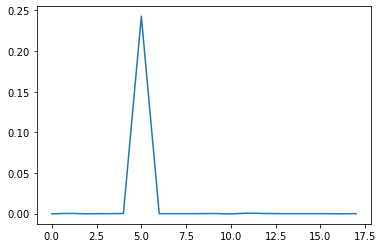

In [111]:
# The 6-th feature work_type is most important.
plt.plot(importances)